## <center> Non-linear dimensionalty reduction techniques </center>

In [1]:
from sklearn.datasets import make_swiss_roll
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA, PCA
from sklearn.manifold import LocallyLinearEmbedding

In [2]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

### Visualization of the Swiss Roll

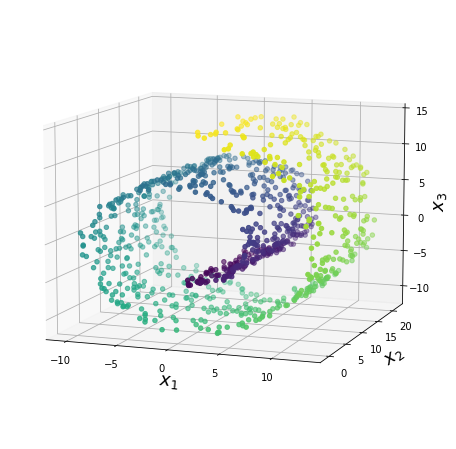

In [3]:
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

### Traditional PCA

In [4]:
pca = PCA(n_components = 2)
X_red = pca.fit_transform(X)

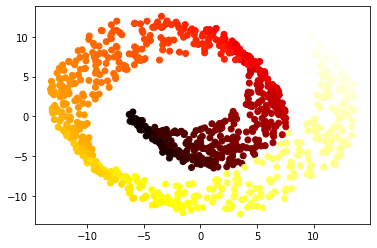

In [5]:
plt.scatter(X_red[:, 0], X_red[:, 1], c=t, cmap=plt.cm.hot)

In [6]:
pca.explained_variance_ratio_

array([0.40782396, 0.3020019 ])

### kernel PCA

There are 3 types of kernels:
- RBF
- Linear - performs similar to the PCA
- Sigmoid

In [7]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
X_red = rbf_pca.fit_transform(X)

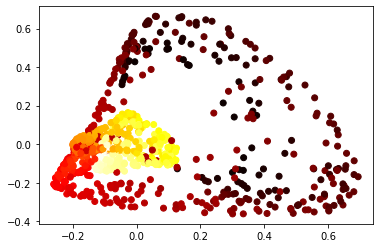

In [8]:
plt.scatter(X_red[:, 0], X_red[:, 1], c=t, cmap=plt.cm.hot)

In [9]:
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)
X_red = sig_pca.fit_transform(X)

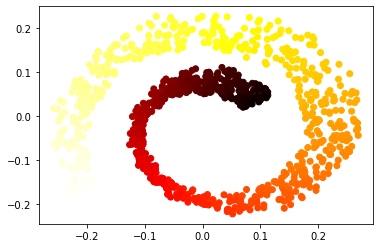

In [10]:
plt.scatter(X_red[:, 0], X_red[:, 1], c=t, cmap=plt.cm.hot)

### Locally Linear Embedding (LLE)

It is a Manifold Learning technique that does not rely on projections like the previous algorithms. In a nutshell, LLE works by first measuring how each training instance linearly relates to its closest neighbors (c.n.), and then looking for a low-dimensional representation of the training set where these local relationships are best preserved

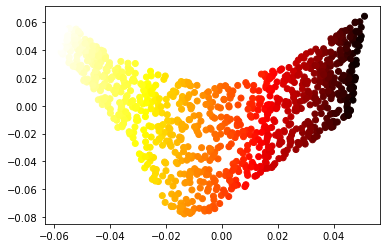

In [11]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)